In [ ]:
#fantastic tutorial here: https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly.html
#but focused on images in folders
#here I assume the data is in a single file

In [80]:
#first write out a training data set:

from sklearn.datasets import california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=california_housing.fetch_california_housing()
cols=data.feature_names
cols.append('y')

X=data.data
y=data.target.reshape(data.target.shape[0],1)


data=pd.DataFrame(np.column_stack([data.data,data.target.reshape((data.target.shape[0],1))]),columns=cols)
data.to_csv('/media/jma/DATA/calhousing.csv',index=False)
print(data.shape)



#list of 100
pd.DataFrame([x for x in range(100)], columns=['VAR1']).to_csv('/media/jma/DATA/testgen.csv',index=False)

data.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [70]:
import csv 
import numpy as np 

def generate_arrays_from_file(file_name,batchsz):
    
    batchCount = 0
    
    inputs = []
    targets = []
            
    linecounter=0 #which line the reader is reading
                
    while True: #infinite loop
        with open(file_name, "r") as csvfile: 
            for line in csv.reader(csvfile):  
                
                if linecounter >0: #is not the header
                    
                    #could procress data as well
                    inputs.append(line[0:8])
                    targets.append(line[8])

                    batchCount += 1 # we added 

                    if batchCount >= batchsz: # we have our mini batch
                        batchCount = 0 #reset batch counter
                        X = np.array(inputs,dtype="float32")
                        y = np.array(targets,dtype="float32")
                        yield (X, y)

                        #reset the lists to hold the batches
                        inputs = [] 
                        targets = []

                linecounter += 1 #increment the line read
            linecounter = 0


In [77]:
from keras.models import Sequential
from keras.layers import Dense


batch_size =64

train_gen=generate_arrays_from_file('/media/jma/DATA/calhousing.csv',batchsz=batch_size)


model = Sequential()
model.add(Dense(50, input_shape=(8,),activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',
              loss='mse', metrics=['mse'])


hist=model.fit_generator(train_gen,steps_per_epoch=data.shape[0] / batch_size, epochs=50, verbose=1)


Epoch 1/50
323/322 [==============================] - 1s 3ms/step - loss: 1900.3325 - mean_squared_error: 1900.3325
Epoch 2/50
323/322 [==============================] - 1s 2ms/step - loss: 115.8557 - mean_squared_error: 115.8557
Epoch 3/50
323/322 [==============================] - 1s 2ms/step - loss: 100.5266 - mean_squared_error: 100.5266
Epoch 4/50
323/322 [==============================] - 1s 2ms/step - loss: 115.3723 - mean_squared_error: 115.3723
Epoch 5/50
323/322 [==============================] - 1s 2ms/step - loss: 111.0745 - mean_squared_error: 111.0745
Epoch 6/50
323/322 [==============================] - 1s 2ms/step - loss: 100.0735 - mean_squared_error: 100.0735
Epoch 7/50
323/322 [==============================] - 1s 2ms/step - loss: 103.5204 - mean_squared_error: 103.5204
Epoch 8/50
323/322 [==============================] - 1s 2ms/step - loss: 99.2570 - mean_squared_error: 99.2570
Epoch 9/50
323/322 [==============================] - 1s 2ms/step - loss: 98.3690 - mean

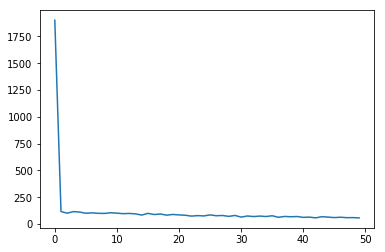

In [83]:
plt.plot(hist.history['mean_squared_error'])